In [3]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

# Setup seaborn plots with figure size 
# sns.set()
plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

In [4]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

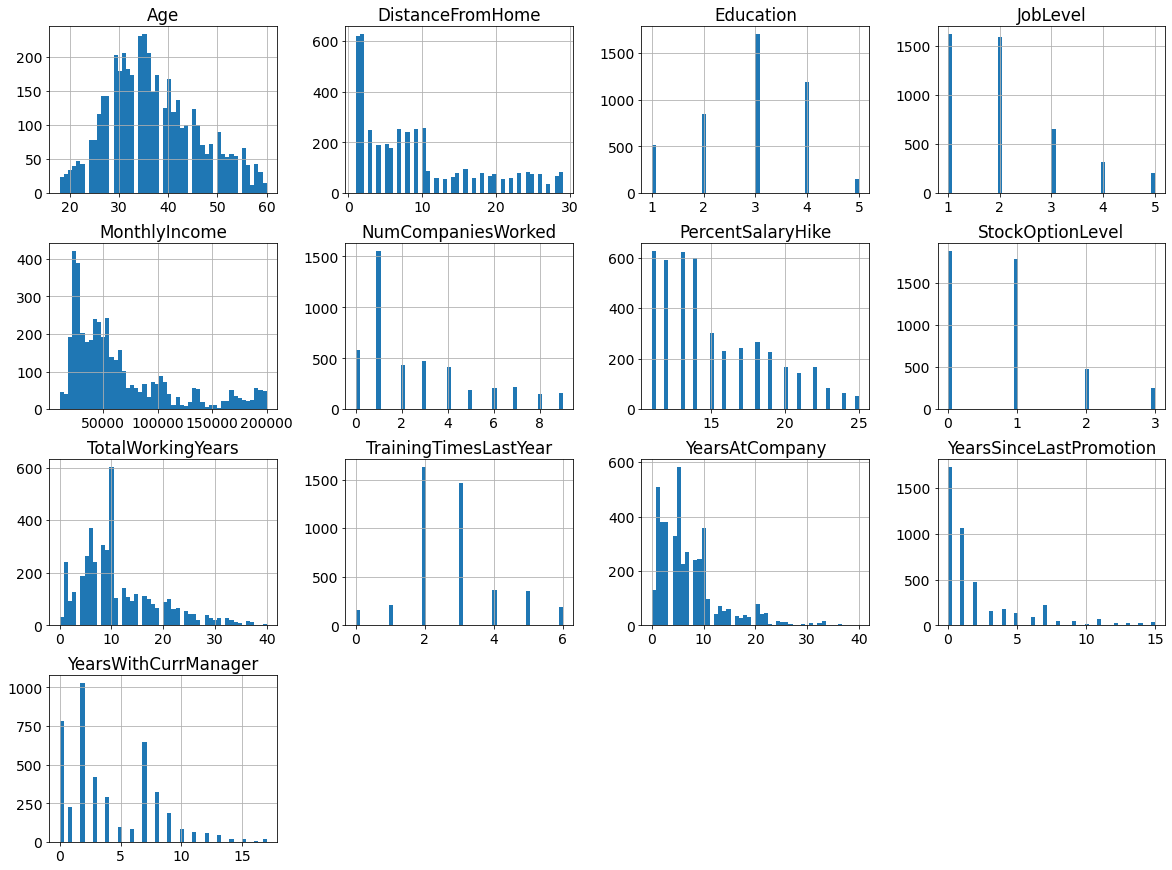

In [5]:
X.hist(bins=50)

# 3.1 Normalization 
In this case the data will be rescaled that none of the samples will be outside the chosen interval .

## 3.1.1 Min max normalization
In this case the interval is set to <0;1>. and the formula is:

<img src="assets/normalization.png" width="200" height="200">

In [6]:
[(1 - (1))/(3-1),(2 - (1))/(3-1),(3 - (1))/(3-1)]


[0.0, 0.5, 1.0]

<AxesSubplot:>

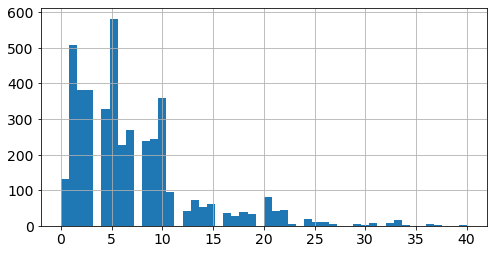

In [7]:
X.YearsAtCompany.hist(bins=50, figsize=(8, 4))

<AxesSubplot:>

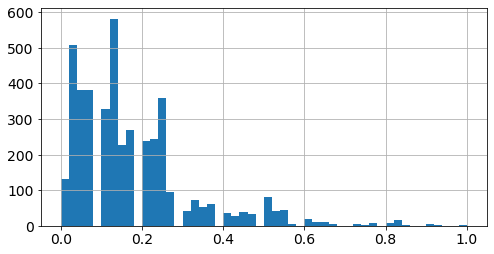

In [8]:
normalizer = MinMaxScaler()
result = normalizer.fit_transform(X.YearsAtCompany.values.reshape(-1,1))
pd.Series(result.reshape(1,-1)[0]).hist(bins=50, figsize=(8, 4))

In [9]:
X.YearsAtCompany.values.reshape(-1,1)

array([[1],
       [5],
       [5],
       ...,
       [3],
       [4],
       [9]])

# 3.1.2 Z-normalization (standard scaling)
The data has various values from different distributions. This operation centers the data around the mean of 0 with standard deviation. 

z = (x - u) / s

x - data</br>
u - mean of data</br>
s - standard deviation</br>

In [6]:
X.YearsAtCompany.mean()

7.010497489730716

In [10]:
X.YearsAtCompany.values.reshape(-1,1)

array([[1],
       [5],
       [5],
       ...,
       [3],
       [4],
       [9]])

<AxesSubplot:>

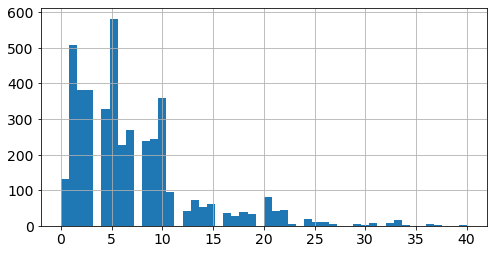

In [11]:
X.YearsAtCompany.hist(bins=50, figsize=(8, 4))

<AxesSubplot:>

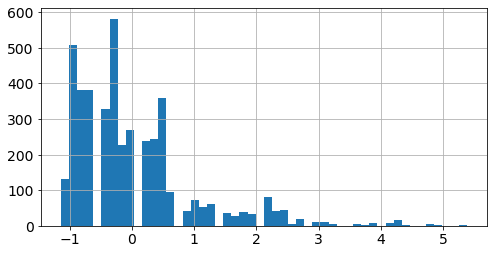

In [9]:
scaler = StandardScaler()
result = scaler.fit_transform(X.YearsAtCompany.values.reshape(-1,1))
pd.Series(result.reshape(1,-1)[0]).hist(bins=50, figsize=(8, 4))

In [10]:
pd.Series(result.reshape(1,-1)[0]).mean()

1.4998905307578565e-17

### WHOLE FRAME APPLICATION

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

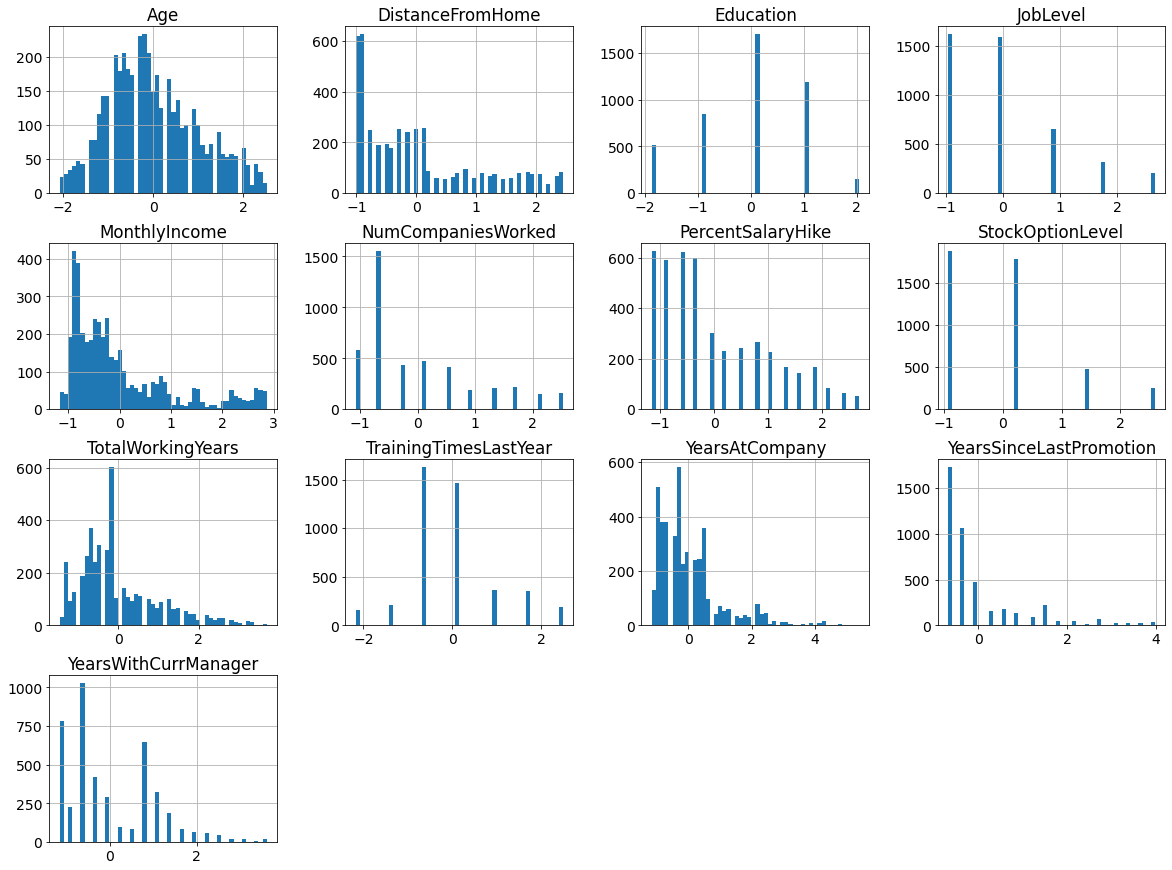

In [11]:
results=scaler.fit_transform(X)
X_scaled = pd.DataFrame(results, index=X.index, columns=X.columns)
X_scaled.hist(bins=50)

## 3.1.3 BEWARE THE FUTURE SCALING
How can we scale with test data incomporated when in reality we dont know what will be the test data? 

In [12]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# Train the scaler with the train data
X_train = scaler.fit_transform(X_train)
# transform the test data 
X_test = scaler.transform(X_test)

# 3.2 Polynomial features 
For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are 

[1, a, b, a^2, ab, b^2].

In [17]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]

In [19]:
pf = PolynomialFeatures(2)

test = pd.DataFrame([[1,2], [1,2]])
test

,0,1
0,1,2
1,1,2


In [21]:
pd.DataFrame(pf.fit_transform(test))

,0,1,2,3,4,5
0,1.0,1.0,2.0,1.0,2.0,4.0
1,1.0,1.0,2.0,1.0,2.0,4.0


# 3.3 Combination evaluation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# No optimalizations 
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



In [19]:
pf = PolynomialFeatures(3)
scaler = StandardScaler()

X_train_pf = pf.fit_transform(X_train)
X_train_pf_scaled = scaler.fit_transform(X_train_pf) 
X_test_pf = pf.transform(X_test)
X_test_pf_scaled = scaler.transform(X_test_pf)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pf_scaled, y_train) 
y_pred = neigh.predict(X_test_pf_scaled)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9179019384264538
0.8223436135587838
0.8526707197915535
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       755
           1       0.68      0.76      0.72       122

    accuracy                           0.92       877
   macro avg       0.82      0.85      0.84       877
weighted avg       0.92      0.92      0.92       877



In [20]:
pf = PolynomialFeatures(3)
scaler = MinMaxScaler()

X_train_pf = pf.fit_transform(X_train)
X_train_pf_scaled = scaler.fit_transform(X_train_pf) 
X_test_pf = pf.transform(X_test)
X_test_pf_scaled = scaler.transform(X_test_pf)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_pf_scaled, y_train) 
y_pred = neigh.predict(X_test_pf_scaled)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9201824401368301
0.8239067000151584
0.8711757681033547
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       755
           1       0.68      0.80      0.74       122

    accuracy                           0.92       877
   macro avg       0.82      0.87      0.84       877
weighted avg       0.93      0.92      0.92       877



# Further reading
- l1 normalization
- l2 normalization 
- outlier detection
- discretization